# フィラデルフィア半導体指数 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'SOX'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='6mo') # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-28 00:00:00-04:00,5138.600098,5163.709961,5005.500000,5059.560059,0,0.0,0.0
2024-08-29 00:00:00-04:00,5068.709961,5157.689941,5010.049805,5029.250000,0,0.0,0.0
2024-08-30 00:00:00-04:00,5154.569824,5176.830078,5075.379883,5158.819824,0,0.0,0.0
2024-09-03 00:00:00-04:00,5058.709961,5058.709961,4735.899902,4759.000000,0,0.0,0.0
2024-09-04 00:00:00-04:00,4707.020020,4844.259766,4695.169922,4770.850098,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-21 00:00:00-05:00,5318.479980,5321.200195,5120.029785,5136.589844,0,0.0,0.0
2025-02-24 00:00:00-05:00,5155.370117,5167.439941,4999.580078,5003.540039,0,0.0,0.0
2025-02-25 00:00:00-05:00,4993.549805,5009.189941,4876.410156,4888.879883,0,0.0,0.0


In [2]:
df0 = ticker.history(period='1y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-28 00:00:00-05:00,4602.109863,4627.169922,4583.819824,4602.600098,0,0.0,0.0
2024-02-29 00:00:00-05:00,4663.890137,4737.069824,4645.470215,4726.919922,0,0.0,0.0
2024-03-01 00:00:00-05:00,4780.990234,4950.259766,4780.990234,4929.580078,0,0.0,0.0
2024-03-04 00:00:00-05:00,4973.520020,5037.569824,4956.149902,4981.970215,0,0.0,0.0
2024-03-05 00:00:00-05:00,4921.660156,4953.959961,4829.359863,4879.830078,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-21 00:00:00-05:00,5318.479980,5321.200195,5120.029785,5136.589844,0,0.0,0.0
2025-02-24 00:00:00-05:00,5155.370117,5167.439941,4999.580078,5003.540039,0,0.0,0.0
2025-02-25 00:00:00-05:00,4993.549805,5009.189941,4876.410156,4888.879883,0,0.0,0.0


In [3]:
period = 20
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2024-02-28 00:00:00-05:00,4602.109863,4627.169922,4583.819824,4602.600098,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2024-02-29 00:00:00-05:00,4663.890137,4737.069824,4645.470215,4726.919922,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2024-03-01 00:00:00-05:00,4780.990234,4950.259766,4780.990234,4929.580078,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2024-03-04 00:00:00-05:00,4973.520020,5037.569824,4956.149902,4981.970215,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2024-03-05 00:00:00-05:00,4921.660156,4953.959961,4829.359863,4879.830078,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21 00:00:00-05:00,5318.479980,5321.200195,5120.029785,5136.589844,0,0.0,0.0,5086.729980,5001.152344,5182.669922,4728.875977,5454.946289
2025-02-24 00:00:00-05:00,5155.370117,5167.439941,4999.580078,5003.540039,0,0.0,0.0,5086.729980,5001.152344,5157.527588,4766.589478,5392.090454
2025-02-25 00:00:00-05:00,4993.549805,5009.189941,4876.410156,4888.879883,0,0.0,0.0,5081.320068,4996.802490,5141.539917,4779.696350,5358.646057


## 日足チャートと Bollinger's bands

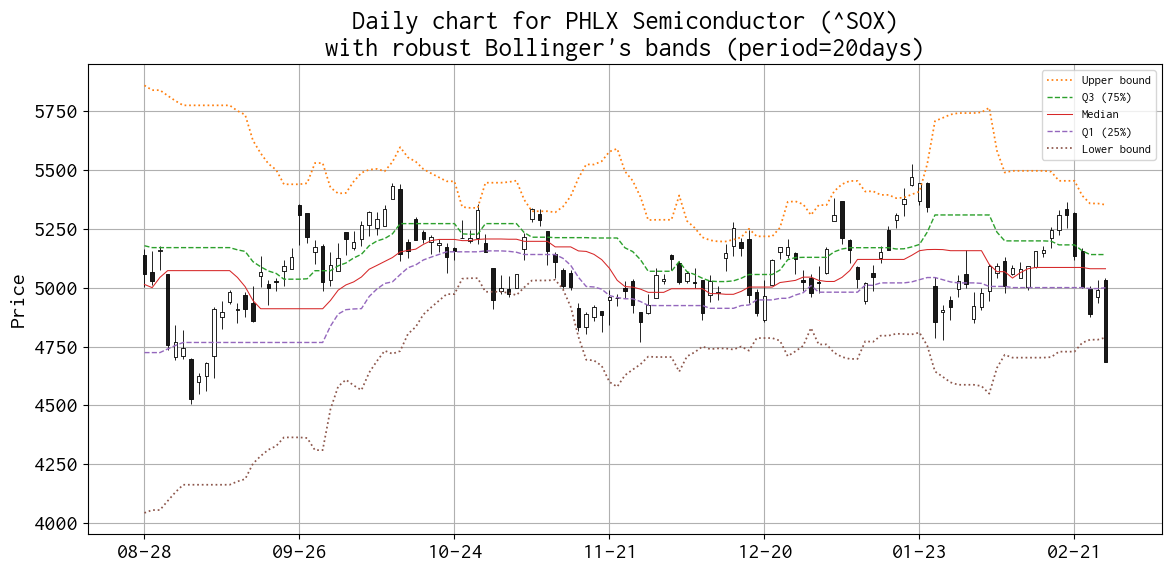

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nwith robust Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nwith robust Bollinger\'s bands (period=20days)' % symbol)

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('daily_chart_bollinger_robust_%s.png' % code)
plt.show()

In [5]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-27 00:00:00-05:00,5032.879883,5041.152832,4684.775879,4686.753418,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-02-26 00:00:00-05:00    4990.819824
2025-02-27 00:00:00-05:00    4686.753418
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-02-26 00:00:00-05:00           NaN
2025-02-27 00:00:00-05:00   -304.066406
Name: Close, dtype: float64